# Homework 6

TFCB 2024

Due date: Nov 14, 2024

In this homework, we will work through a series of manipulations to analyze a published deep sequencing
dataset using `tidyverse` functions.

In the process, we will learn some new functions in `tidyverse` and apply
them to our data analysis.

For more information about the data used in this homework, see
[this page](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE89183).


In [1]:
library(tidyverse)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.1     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Problem 1

**10 points**

For each of the following functions, provide a <100 character description
(in your own words) and a URL reference.

1. `!` - it means "not". Can use in negation logic if you want to select something that is not something. 
1. `colnames()` - will return column names in a df 
2. `is.na` - will tell you if a specified value is "NA" with True or false as a return value. Useful for filtering out all NA values from a data frame 
3. `is.numeric` - similar, will tell you is a variable or object in a data frame is a number. It will return True or false 
4. `anti_join` - will join all unique rows in "x" that are not in "y"  https://dplyr.tidyverse.org/reference/filter-joins.html
5. `desc`- this means decending order and is good to use with arrange()
6. `dplyr::slice` - will let you take a subset of rows based on their index in the df https://dplyr.tidyverse.org/reference/slice.html
7. `dplyr::across` - lets you apply some function across many columns https://dplyr.tidyverse.org/reference/across.html


## Problem 2

**10 points**

Add a comment above each code line below explaining what the code line does and/or why
that code line is necessary.

Keep each comment to less than 2 lines per line of code and < 80 chars per line.

In [51]:
# read in txt file in a database online as a df called annotations 
annotations <- read_tsv("ftp://ftp.ebi.ac.uk/pub//databases/genenames/out_of_date_hgnc/tsv/locus_groups/protein-coding_gene.txt") %>%
# select a subset of columns 
  select(ensembl_gene_id, symbol, name, gene_group, ccds_id) %>%
# filter out all the na values in the ccds_id columns 
  filter(!is.na(ccds_id)) %>%
# print resulting df 
  print()

Warning message:
"One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)"
Rows: 19260 Columns: 54
-- Column specification --------------------------------------------------------
Delimiter: "\t"
chr  (36): hgnc_id, symbol, name, locus_group, locus_type, status, location,...
dbl   (4): entrez_id, omim_id, homeodb, orphanet
lgl  (10): mirbase, snornabase, imgt, kznf_gene_catalog, mamit-trnadb, lncrn...
date  (4): date_approved_reserved, date_symbol_changed, date_name_changed, d...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 13,559 x 5
   ensembl_gene_id symbol  name                               gene_group ccds_id
   <chr>           <chr>   <chr>                              <chr>      <chr>  
 1 ENSG00000121410 A1BG    alpha-1-B glycoprotein             Immunoglo~ CCDS12~
 2 ENSG00000175899 A2M     alpha-2-macroglobulin              Alpha-2-m~ CCDS44~
 3 ENSG00000166535 A2ML1   alpha-2-macroglobulin like 1       Alpha-2-m~ CCDS85~
 4 ENSG00000184389 A3GALT2 alpha 1,3-galactosyltransferase 2  Glycosylt~ CCDS60~
 5 ENSG00000128274 A4GALT  alpha 1,4-galactosyltransferase (~ Alpha 1,4~ CCDS14~
 6 ENSG00000118017 A4GNT   alpha-1,4-N-acetylglucosaminyltra~ Alpha 1,4~ CCDS30~
 7 ENSG00000081760 AACS    acetoacetyl-CoA synthetase         Acyl-CoA ~ CCDS92~
 8 ENSG00000114771 AADAC   arylacetamide deacetylase          Lipases|A~ CCDS33~
 9 ENSG00000197953 AADACL2 arylacetamide deacetylase like 2   Arylaceta~ CCDS31~
10 ENSG00000188984 AADACL3 arylacetamide deacetylase like 3   Arylaceta~ CCDS41~
# i 1

In [26]:
# read in txt compressed file in a database online as a df called data 
data <- read_tsv("ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE89nnn/GSE89183/suppl/GSE89183_Counts.txt.gz") %>%
# rename the column "ensembl_gene_id" as "ENSEMBL gene"
  rename(ensembl_gene_id = `ENSEMBL gene`) %>%
# print the final df 
  print()

Rows: 63677 Columns: 15
-- Column specification --------------------------------------------------------
Delimiter: "\t"
chr  (1): ENSEMBL gene
dbl (14): CD34_shTSR2_RNA_1, CD34_shTSR2_RNA_2, CD34_shRPL5_RNA_1, CD34_shRP...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 63,677 x 15
   ensembl_gene_id CD34_shTSR2_RNA_1 CD34_shTSR2_RNA_2 CD34_shRPL5_RNA_1
   <chr>                       <dbl>             <dbl>             <dbl>
 1 ENSG00000000003                48                56                40
 2 ENSG00000000005                 0                 2                 0
 3 ENSG00000000419               880               744              1116
 4 ENSG00000000457               124               113               149
 5 ENSG00000000460               249               262               289
 6 ENSG00000000938                89                64               204
 7 ENSG00000000971               106                86               241
 8 ENSG00000001036               897               613              1487
 9 ENSG00000001084               965              1027              1036
10 ENSG00000001167               721               835               498
# i 63,667 more rows
# i 11 more variables: CD34_shRPL5_RNA_2 <dbl>, CD34_shRPL5_RPF_1 <dbl>,
#   CD

## Problem 3

**10 points**

Using the code below:

1. Convert both axes to `log10` instead of linear scales.
2. Show axis tick labels as 10^0^, 10^1^, 10^2^,10^3^, 10^4^, 10^5^ for both axes.
3. There are too many points overlapping in certain regions. Use a different
`geom_` function to convey to your reader how many overlapping points are present
in each region.

Warning message in scale_y_log10(breaks = c(1, 10, 100, 1000, 10000, 1e+05), labels = expression(10^0, :
"log-10 transformation introduced infinite values."


Warning message in scale_x_log10(breaks = c(1, 10, 100, 1000, 10000, 1e+05), labels = expression(10^0, :
"log-10 transformation introduced infinite values."
Warning message in scale_y_log10(breaks = c(1, 10, 100, 1000, 10000, 1e+05), labels = expression(10^0, :
"log-10 transformation introduced infinite values."
Warning message in scale_x_log10(breaks = c(1, 10, 100, 1000, 10000, 1e+05), labels = expression(10^0, :
"log-10 transformation introduced infinite values."
Warning message:
"Removed 43031 rows containing non-finite outside the scale range
(`stat_bin2d()`)."


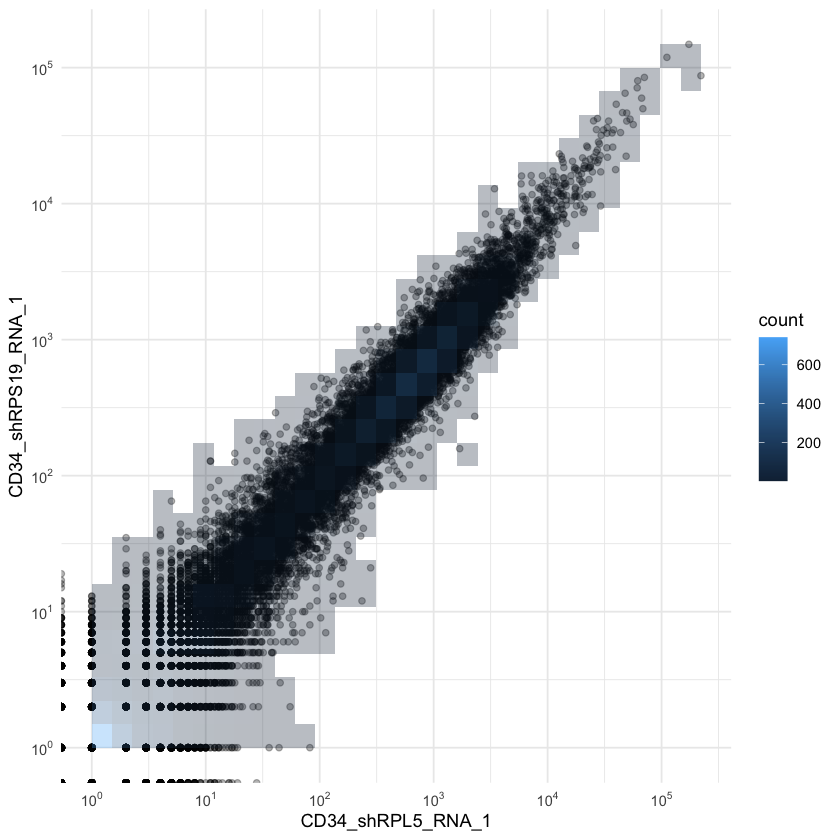

In [9]:
data %>%
  select(CD34_shRPL5_RNA_1, CD34_shRPS19_RNA_1) %>%
  ggplot(aes(x = CD34_shRPL5_RNA_1, y = CD34_shRPS19_RNA_1)) +
  scale_y_log10( breaks=c(1, 10, 100, 1000, 10000, 100000),labels = expression(10^0, 10^1, 10^2, 10^3, 10^4, 10^5)) +
  scale_x_log10( breaks=c(1, 10, 100, 1000, 10000, 100000),labels = expression(10^0, 10^1, 10^2, 10^3, 10^4, 10^5)) +
  geom_point(alpha = 0.3) + 
  geom_bin2d(alpha = 0.3) + 
  theme_minimal()

**In problems 4 through 6, assign the result of your operation back to the `data`
variable.**

## Problem 4

**10 points**

Write a code cell to select the following columns from the `data` variable you created above and reassign back to `data`.

Columns to select: `ensembl_gene_id`, columns that have either `RPL5`, `RPS19`, or `Luc` in their name.

Instead of listing every column, use [`matches`](https://tidyselect.r-lib.org/reference/starts_with.html) and a succinct [regular expression](https://stringr.tidyverse.org/articles/regular-expressions.html) to select the above columns.

In [27]:
data <- data  %>% 
    select(ensembl_gene_id, contains("RPL5", ignore.case = TRUE),
           contains("RPS19", ignore.case = TRUE),
           contains("Luc", ignore.case = TRUE))
print(data)

# A tibble: 63,677 x 13
   ensembl_gene_id CD34_shRPL5_RNA_1 CD34_shRPL5_RNA_2 CD34_shRPL5_RPF_1
   <chr>                       <dbl>             <dbl>             <dbl>
 1 ENSG00000000003                40                49                 6
 2 ENSG00000000005                 0                 0                 0
 3 ENSG00000000419              1116              1000               101
 4 ENSG00000000457               149               126                14
 5 ENSG00000000460               289               268                52
 6 ENSG00000000938               204               145                17
 7 ENSG00000000971               241               203                45
 8 ENSG00000001036              1487               936               182
 9 ENSG00000001084              1036              1224               134
10 ENSG00000001167               498               557                75
# i 63,667 more rows
# i 9 more variables: CD34_shRPL5_RPF_2 <dbl>, CD34_shRPS19_RNA_1 <dbl>,
#   CD

## Problem 5

**10 points**

Write a code cell to filter the result from Problem 4 to include only rows where each of the 12 numerical columns you selected has 50 counts or more  and reassign back to `data`.
This is a simple way to avoid genes that have very low counts.

You might be tempted to do this step separately for each of the 12 columns, but instead use the `across` function you learned above or the `pivot_longer` function from the class (either way is fine).

In [28]:
data <- data  %>%
    filter(across(c(2:13), ~ . >= 50))
print(data)

Warning message:
"Using `across()` in `filter()` was deprecated in dplyr 1.0.8.
i Please use `if_any()` or `if_all()` instead."


# A tibble: 4,239 x 13
   ensembl_gene_id CD34_shRPL5_RNA_1 CD34_shRPL5_RNA_2 CD34_shRPL5_RPF_1
   <chr>                       <dbl>             <dbl>             <dbl>
 1 ENSG00000000419              1116              1000               101
 2 ENSG00000001036              1487               936               182
 3 ENSG00000001084              1036              1224               134
 4 ENSG00000001497              1436              1231               253
 5 ENSG00000002549              1228              1186               285
 6 ENSG00000002586              2746              1600               260
 7 ENSG00000002834              4346              3800               254
 8 ENSG00000003056              1379              1661               321
 9 ENSG00000003393               832               690                84
10 ENSG00000003402              1836              1382                95
# i 4,229 more rows
# i 9 more variables: CD34_shRPL5_RPF_2 <dbl>, CD34_shRPS19_RNA_1 <dbl>,
#   CD34

## Problem 6

**10 points**

Write a code cell to divide each of the 12 numerical columns by the
corresponding median value for each column
and reassign back to `data`. This median normalization is typically done in
high-throughput experiments after filtering
to normalize for sample-to-sample difference in read depth.

Again, you can write lot less code if you use the `mutate` and `across` function
you learned above.


In [38]:
#https://dplyr.tidyverse.org/reference/across.html

data_summary <- data %>%
  mutate(across(2:13, ~ . / median(.), .names = "norm_{.col}"))

head(data_summary)

ensembl_gene_id,CD34_shRPL5_RNA_1,CD34_shRPL5_RNA_2,CD34_shRPL5_RPF_1,CD34_shRPL5_RPF_2,CD34_shRPS19_RNA_1,CD34_shRPS19_RNA_2,CD34_shRPS19_RPF_1,CD34_shRPS19_RPF_2,CD34_shLuc_RNA_1,...,norm_CD34_shRPL5_RPF_1,norm_CD34_shRPL5_RPF_2,norm_CD34_shRPS19_RNA_1,norm_CD34_shRPS19_RNA_2,norm_CD34_shRPS19_RPF_1,norm_CD34_shRPS19_RPF_2,norm_CD34_shLuc_RNA_1,norm_CD34_shLuc_RNA_2,norm_CD34_shLuc_RPF_1,norm_CD34_shLuc_RPF_2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000419,1116,1000,101,249,691,675,212,133,1030,...,0.6196319,0.8956835,0.6748047,0.5968170,1.0495050,0.8471338,0.7692308,0.8198504,0.8661417,0.8571429
ENSG00000001036,1487,936,182,295,800,752,148,136,913,...,1.1165644,1.0611511,0.7812500,0.6648983,0.7326733,0.8662420,0.6818521,0.5805574,0.7440945,1.0892857
ENSG00000001084,1036,1224,134,275,558,817,169,95,1479,...,0.8220859,0.9892086,0.5449219,0.7223696,0.8366337,0.6050955,1.1045556,1.1257648,0.8661417,1.0357143
ENSG00000001497,1436,1231,253,367,885,1016,195,137,1647,...,1.5521472,1.3201439,0.8642578,0.8983201,0.9653465,0.8726115,1.2300224,1.4398368,2.3385827,2.3333333
ENSG00000002549,1228,1186,285,447,693,897,260,229,1537,...,1.7484663,1.6079137,0.6767578,0.7931034,1.2871287,1.4585987,1.1478715,1.1339225,1.8070866,1.6190476
ENSG00000002586,2746,1600,260,395,2570,1989,379,258,819,...,1.5950920,1.4208633,2.5097656,1.7586207,1.8762376,1.6433121,0.6116505,0.5513256,0.6535433,0.6666667


## Problem 7

**10 points**

After we do the above filtering and median-normalization, let us calculate
translation efficiency as the average ratio of the RPF and RNA reads for each
treatment condition. Then we calculate how this translation efficiency changes
between target (`rpl5` and `rps19`) and control (`luc`) shRNAs.

The code implementing the above steps is shown below, but it has a few
errors. Correct them.


In [45]:
lfc <- data_summary %>%
  mutate(mean_rpl5_te = ((CD34_shRPL5_RPF_1 + CD34_shRPL5_RPF_2)) /
                            ((CD34_shRPL5_RNA_1 + CD34_shRPL5_RNA_2))) %>%
  mutate(mean_rps19_te = ((CD34_shRPS19_RPF_1 + CD34_shRPS19_RPF_2)) /
                            ((CD34_shRPS19_RNA_1 + CD34_shRPS19_RNA_2))) %>%
  mutate(mean_shluc_te = ((CD34_shLuc_RPF_1 + CD34_shLuc_RPF_2)) /
                            ((CD34_shLuc_RNA_1 + CD34_shLuc_RNA_2))) %>%
  select(ensembl_gene_id, mean_rpl5_te, mean_rps19_te, mean_shluc_te) %>%
  mutate(lfc_te_rpl5 = log2(mean_rpl5_te / mean_shluc_te),
         lfc_te_rps19 = log2(mean_rps19_te / mean_shluc_te)) %>%
  print()

# A tibble: 4,239 x 6
   ensembl_gene_id mean_rpl5_te mean_rps19_te mean_shluc_te lfc_te_rpl5
   <chr>                  <dbl>         <dbl>         <dbl>       <dbl>
 1 ENSG00000000419       0.165         0.253         0.163       0.0230
 2 ENSG00000001036       0.197         0.183         0.211      -0.0968
 3 ENSG00000001084       0.181         0.192         0.126       0.526 
 4 ENSG00000001497       0.232         0.175         0.262      -0.172 
 5 ENSG00000002549       0.303         0.308         0.228       0.411 
 6 ENSG00000002586       0.151         0.140         0.171      -0.178 
 7 ENSG00000002834       0.0818        0.0667        0.0771      0.0840
 8 ENSG00000003056       0.335         0.309         0.151       1.15  
 9 ENSG00000003393       0.141         0.194         0.0683      1.04  
10 ENSG00000003402       0.0879        0.0701        0.0518      0.763 
# i 4,229 more rows
# i 1 more variable: lfc_te_rps19 <dbl>


## Problem 8

**10 points**

Write code that will create a new dataframe called `mean_lfc` from `lfc`
containing a new column called `avg_lfc`.
`avg_lfc` should be the average of the log2 fold-change in TE (`lfc_te`) upon
knockdown of RPL5 and RPS19.

Then select only the gene id column and the new column that you just created
(this will be your new dataframe `mean_lfc`).


In [46]:
head(lfc)

ensembl_gene_id,mean_rpl5_te,mean_rps19_te,mean_shluc_te,lfc_te_rpl5,lfc_te_rps19
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000419,0.1654064,0.2525622,0.1627907,0.02299703,0.6336206
ENSG00000001036,0.1968634,0.1829897,0.2105263,-0.09680572,-0.2022382
ENSG00000001084,0.1809735,0.1920000,0.1256778,0.52604788,0.6113761
ENSG00000001497,0.2324709,0.1746449,0.2618858,-0.17188739,-0.5845131
ENSG00000002549,0.3032312,0.3075472,0.2280811,0.41087092,0.4312607
ENSG00000002586,0.1507133,0.1397236,0.1705521,-0.17840619,-0.2876370


In [68]:
mean_lfc <- lfc  %>% 
    mutate(avg_lfc = ((lfc_te_rpl5 + lfc_te_rps19) / 2)) %>%
    select(ensembl_gene_id, avg_lfc) %>%
    print()

# A tibble: 4,239 x 2
   ensembl_gene_id avg_lfc
   <chr>             <dbl>
 1 ENSG00000000419  0.328 
 2 ENSG00000001036 -0.150 
 3 ENSG00000001084  0.569 
 4 ENSG00000001497 -0.378 
 5 ENSG00000002549  0.421 
 6 ENSG00000002586 -0.233 
 7 ENSG00000002834 -0.0623
 8 ENSG00000003056  1.09  
 9 ENSG00000003393  1.27  
10 ENSG00000003402  0.600 
# i 4,229 more rows



## Problem 9

**10 points**

Write code to join the `mean_lfc` dataframe with the `annotations` dataframe created
at the top of the document and assign back to `mean_lfc`.


In [71]:
mean_lfc <- left_join(mean_lfc, annotations, by = "ensembl_gene_id")
head(merged_data)

ensembl_gene_id,avg_lfc,symbol,name,gene_group,ccds_id
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
ENSG00000000419,0.3283088,NA,NA,NA,NA
ENSG00000001036,-0.1495220,FUCA2,alpha-L-fucosidase 2,Alpha-L-fucosidases,CCDS5200
ENSG00000001084,0.5687120,GCLC,glutamate-cysteine ligase catalytic subunit,NA,CCDS75471|CCDS4952
ENSG00000001497,-0.3782002,NA,NA,NA,NA
ENSG00000002549,0.4210658,LAP3,leucine aminopeptidase 3,Aminopeptidases,CCDS3422
ENSG00000002586,-0.2330216,NA,NA,NA,NA


## Problem 10

**10 points**

1. Write code to select only the bottom 10 genes with the lowest `avg_lfc` and display the gene `symbol`, gene `name` and `avg_lfc` for these genes.
2. Create a figure using `ggplot2` to visualize these results.

Write a few sentences to justify the choices you made when creating your figure.

In [82]:
bottom_10 <- mean_lfc  %>% 
    arrange(avg_lfc) %>% 
    select(symbol, avg_lfc, name)  %>% 
    filter(!is.na(avg_lfc), !is.na(symbol), !is.na(name)) %>%
    head(10)

sorted_order <- bottom_10$symbol
bottom_10$symbol <- factor(bottom_10$symbol, levels = sorted_order)

print(bottom_10)

# A tibble: 10 x 3
   symbol  avg_lfc name                                      
   <fct>     <dbl> <chr>                                     
 1 H2AC6     -2.82 H2A clustered histone 6                   
 2 H2BC12    -2.67 H2B clustered histone 12                  
 3 COX8A     -1.99 cytochrome c oxidase subunit 8A           
 4 RPL18A    -1.84 ribosomal protein L18a                    
 5 RPLP1     -1.80 ribosomal protein lateral stalk subunit P1
 6 RPS26     -1.77 ribosomal protein S26                     
 7 H2AX      -1.73 H2A.X variant histone                     
 8 RPS15A    -1.57 ribosomal protein S15a                    
 9 RPS11     -1.55 ribosomal protein S11                     
10 TMEM160   -1.53 transmembrane protein 160                 


this one is a single line heat map that kinda shows the differences between the top 10 downregulated genes

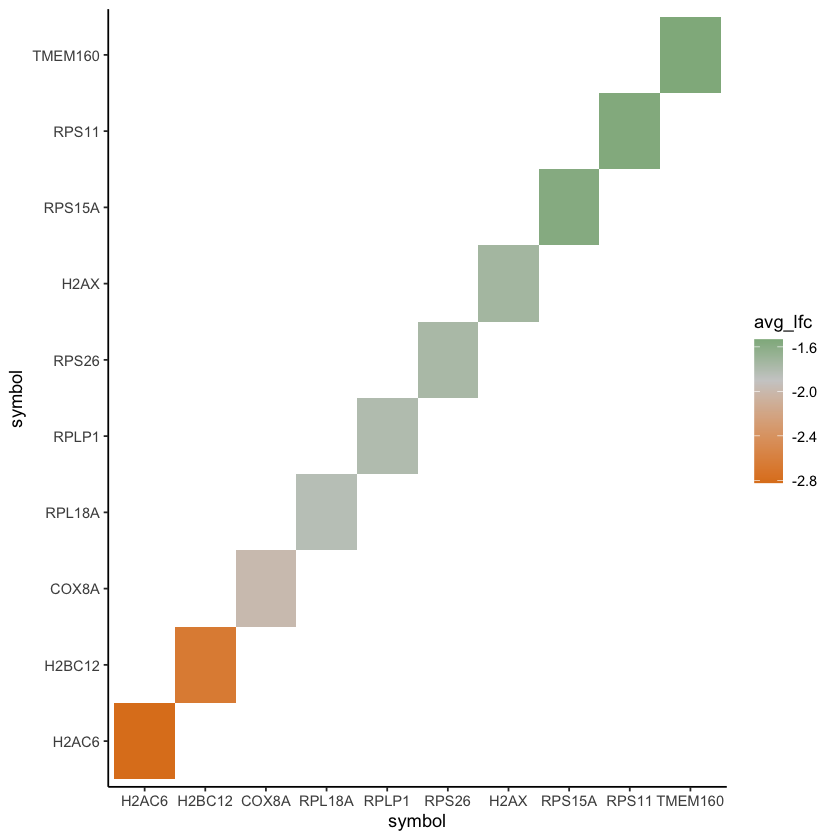

In [173]:
ggplot(bottom_10, aes(x = symbol, y = symbol, fill = avg_lfc)) +
geom_tile() +
scale_fill_gradient2(low = "#df8020", mid = "#cdcdcd", high = "#168d2c", midpoint = -1.9) +
theme_classic()

this one is a dot plot that displays the data bit clearer but it still looks sparse

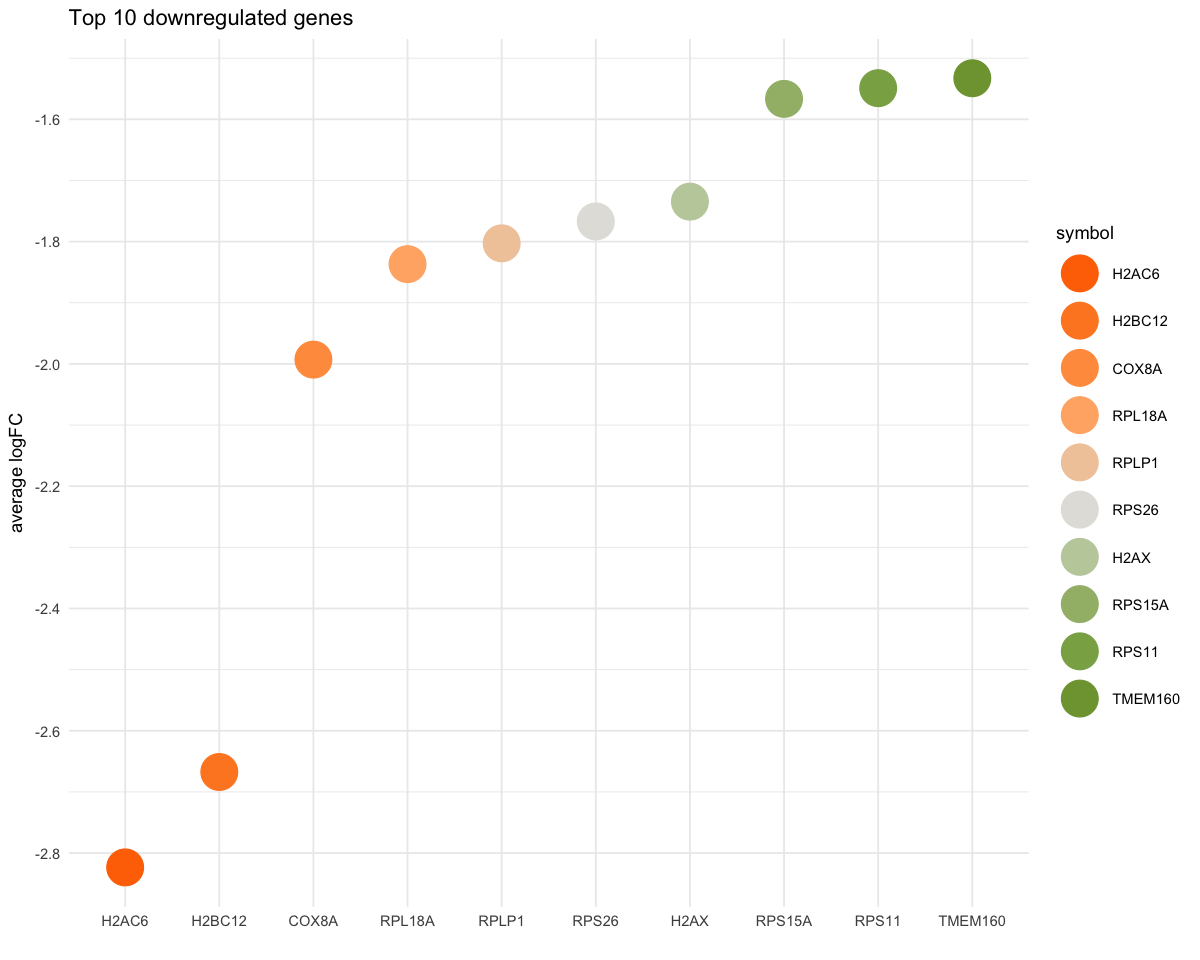

In [220]:
library(paletteer)
ggplot(bottom_10, aes(x = symbol, y = avg_lfc, color = symbol)) +
geom_point(size = 10) +
labs(x = "",y = "average logFC", title = "Top 10 downregulated genes") +
scale_color_paletteer_d("MoMAColors::Avedon") +
scale_y_continuous(breaks = c(seq(-3, -1, by = 0.2))) + 
theme_minimal()

this one was just for fun. Its a lollipop chart

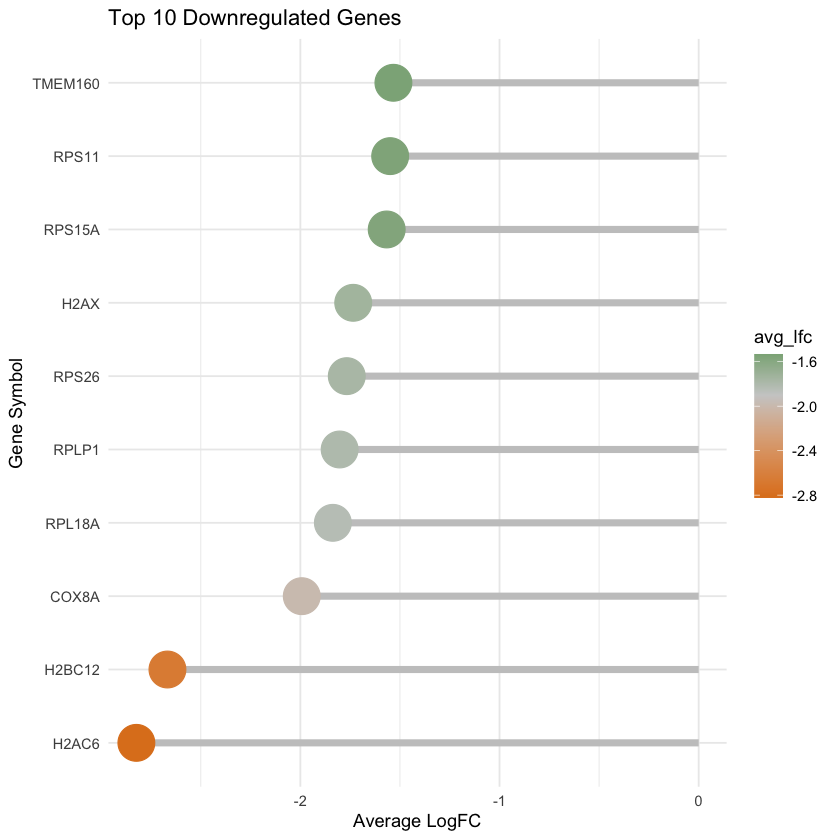

In [181]:
ggplot(bottom_10, aes(x = reorder(symbol, avg_lfc), y = avg_lfc)) +
  geom_segment(aes(xend = symbol, y = 0, yend = avg_lfc), color = "#c7c7c7", linewidth = 2) +
  geom_point(aes(color = avg_lfc), size = 10) +
  scale_color_gradient2(low = "#df8020", mid = "#cdcdcd", high = "#0a8120", midpoint = -1.9) +
  labs(x = "Gene Symbol", y = "Average LogFC", title = "Top 10 Downregulated Genes") +
  coord_flip() +
  theme_minimal()

this one is cool be cause the geom_text allows the labels to use the actual gene name 

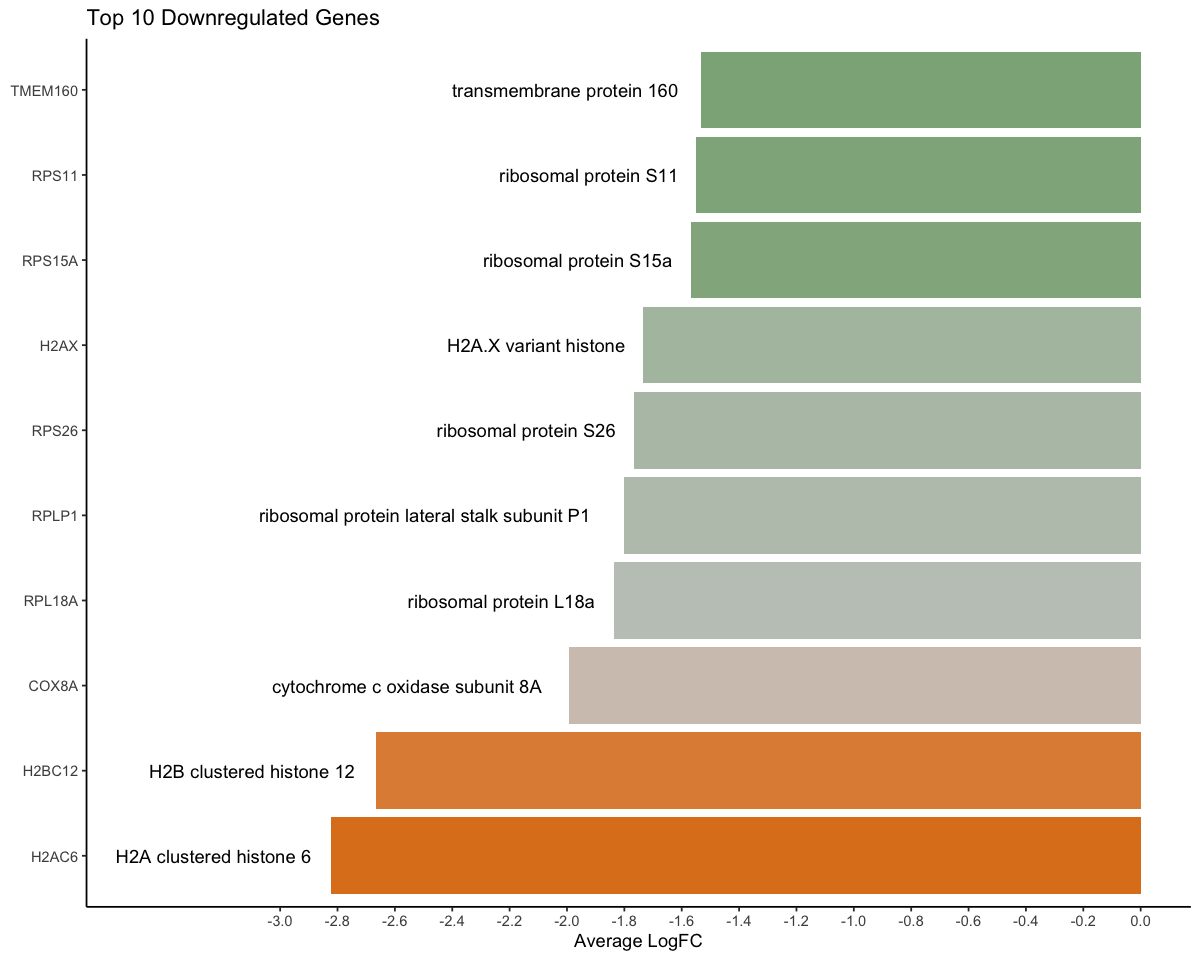

In [222]:
options(repr.plot.width = 10, repr.plot.height = 8)
ggplot(bottom_10, aes(x = avg_lfc, y = reorder(symbol, avg_lfc), fill = avg_lfc)) +
  geom_col(show.legend = FALSE) +
  geom_text(aes(label = name), hjust = 1.1, color = "black") +
  scale_fill_gradient2(low = "#df8020", mid = "#cdcdcd", high = "#0a8120", midpoint = -1.9) +
  labs(x = "Average LogFC", y = NULL, title = "Top 10 Downregulated Genes") +
  scale_x_continuous(breaks = c(seq(-3, -0, by = 0.2)), limits = c(-3.5, -0)) +
  theme_classic()